# Robust Segmentation
In order to have a powerfull 3D reconstruction pipeline it is required that we have a robust segmentation of the object from the background. We can obtain this in three ways:
- Controlled Foreground
- Precise segmentation algorithm
- Robust 3D Reconstruction algorithm to imperfections

## Imports
Main functions will be stored in src.image_segmentation

In [ ]:
import matplotlib.pyplot as plt

from src.image_segmentation.utils import load_scans
from src.image_segmentation.segment_stump import segment_scans

/Users/guilhermec.f/Documents/EPFL/N-Pulse/ARM-SOFT-Scanning/3d_reconstruction/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
picked_dataset = "dataset_d30"
reconstruction_dataset = "reconstruction" + picked_dataset.split("dataset")[-1]

## 1. Initial Approach
For an initial approach, a ML moodel is sed as it is the quickest way to achieve a robust and precise result. However, it wold be intersting to have a traditional method or a fine-tuned model. Please revisit this step later on

In [3]:
dataset_path = f"/Users/guilhermec.f/Documents/EPFL/N-Pulse/ARM-SOFT-Scanning/blender_simulator/simulated_frames/{picked_dataset}/train"

scans, scans_names = load_scans(dataset_path)
print(f"Number of scans: {len(scans)}")

Number of scans: 12


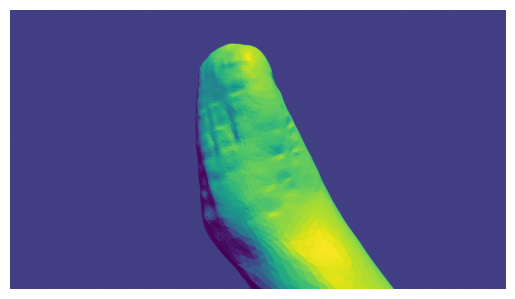

In [4]:
plt.figure(figsize=None)
plt.imshow(scans[0])
plt.axis('off')
plt.show()

Loaded as API: https://zhengpeng7-birefnet-demo.hf.space ✔
    ✔ Segmented 0271.png (1/12)
    ✔ Segmented 0301.png (2/12)
❌ Error while segmenting 0061.png: You have exceeded your GPU quota (60s requested vs. 57s left). Try again in 23:31:35
⚠️ Pipeline aborted, but 2 images were segmented.
✅ Segmentation completed for 12 images in 21.64 seconds.


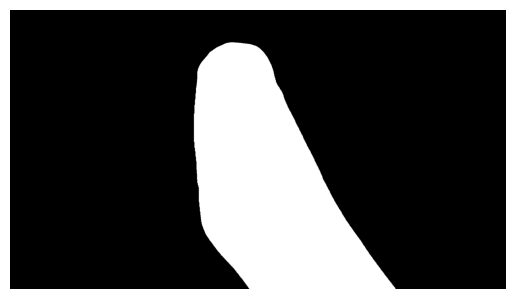

In [ ]:
segmented_imgs = segment_scans(dataset_path, scans_names, output_path=f"figures/{reconstruction_dataset}/segmented", verbose=2)

plt.figure(figsize=None)
plt.imshow(segmented_imgs[0], cmap='gray')
plt.axis('off')
plt.show()